## DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

# Create dataframe from boxing data csv 'bouts_out_new.csv'

df = pd.read_csv('bouts_out_new.csv')

# Limit the Dataframe to those rows where all physical attribute columns are non-null.

df = df[df.loc[:,'age_A':'weight_B'].notnull().all(1)]

# Create a dictionary with each numerical column name, and the acceptable range of values for that column.

num_cols_dict = {col: (df[col].quantile(0.01), df[col].quantile(0.99)) for col in df.describe().columns}

# Use the col_ranges dictionary to replace all unacceptable values with NaN, 
# and then fill the NaN values with the median of each column.

for col in num_cols_dict.keys():
    df[col] = df[col].where((df[col] >= num_cols_dict[col][0]) & (df[col] <= num_cols_dict[col][1]))
    df[col] = df[col].fillna(df[col].median())
    
# Remove the "stance" column, as there are too many null values. 
# Remove the "judge" columns, since the "result" column already denotes the winner.

df = df.drop(['stance_A','stance_B','judge1_A', 'judge1_B', 'judge2_A', 'judge2_B','judge3_A','judge3_B'], axis=1)

# Remove any rows where the "kos" for any boxer is greater than his "wins"

df = df[(df['won_A']>=df['kos_A']) & (df['won_B']>=df['kos_B'])]

df.describe()



,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B
count,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000
mean,26.750880,28.317804,176.042224,175.344968,181.492048,180.572695,156.603800,156.917382,28.940887,26.180155,3.278677,6.423927,1.240253,1.558480,17.301478,15.125968
std,4.849727,4.932603,8.935638,8.965301,11.369422,11.298199,36.761067,36.965235,23.831230,19.934943,4.685435,6.853592,2.779806,2.787772,12.875696,11.398632
min,18.000000,18.000000,158.000000,157.000000,160.000000,157.000000,107.000000,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,25.000000,170.000000,168.000000,173.000000,173.000000,130.000000,130.000000,14.000000,14.000000,0.000000,2.000000,0.000000,0.000000,8.000000,7.000000
50%,26.000000,28.000000,175.000000,175.000000,180.000000,180.000000,147.000000,147.000000,24.000000,22.000000,1.000000,4.000000,0.000000,1.000000,15.000000,13.000000
75%,30.000000,32.000000,183.000000,182.000000,188.000000,188.000000,173.000000,174.000000,36.000000,34.000000,4.000000,9.000000,1.000000,2.000000,23.000000,21.000000
max,42.000000,42.000000,199.000000,198.000000,213.000000,211.000000,260.000000,263.000000,160.000000,118.000000,28.000000,39.000000,21.000000,21.000000,76.000000,68.000000


## EXPLORATORY DATA ANALYSIS

win_A    5864
win_B     959
draw      282
Name: result, dtype: int64

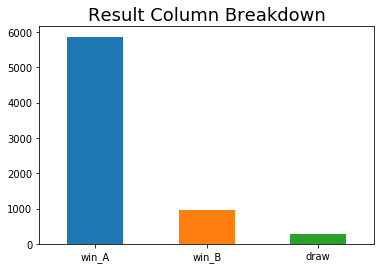

In [2]:
# Explore the distribution of wins

df['result'].value_counts().plot(kind='bar', rot=0)
plt.title('Result Column Breakdown', fontsize=18)
df['result'].value_counts()

Text(0,0.5,'Difference in Reach')

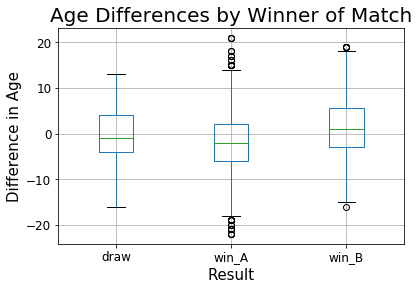

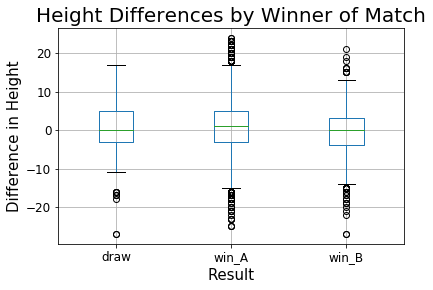

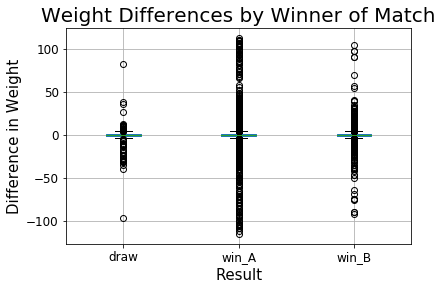

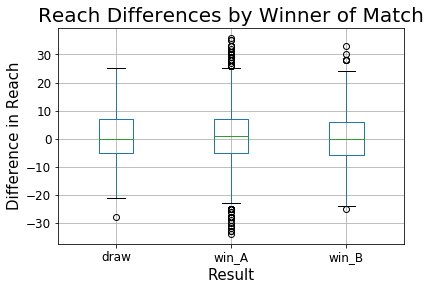

In [3]:
# Create columns for the differentials between the ages, heights, weights, and reaches of Boxer A and Boxer B.

df['diff_age'] = df['age_A'] - df['age_B']
df['diff_height'] = df['height_A'] - df['height_B']
df['diff_weight'] = df['weight_A'] - df['weight_B']
df['diff_reach'] = df['reach_A'] - df['reach_B']

# Create boxplots showing the distribution of the above 4 columns, separated by the result of the match.

df.boxplot(column = 'diff_age', by ='result', fontsize=12)
plt.suptitle('')
plt.title('Age Differences by Winner of Match', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in Age', fontsize=15)

df.boxplot(column = 'diff_height', by ='result', fontsize=12)
plt.suptitle('')
plt.title('Height Differences by Winner of Match', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in Height', fontsize=15)

df.boxplot(column = 'diff_weight', by ='result', fontsize=12)
plt.suptitle('')
plt.title('Weight Differences by Winner of Match', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in Weight', fontsize=15)

df.boxplot(column = 'diff_reach', by ='result', fontsize=12)
plt.suptitle('')
plt.title('Reach Differences by Winner of Match', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in Reach', fontsize=15)



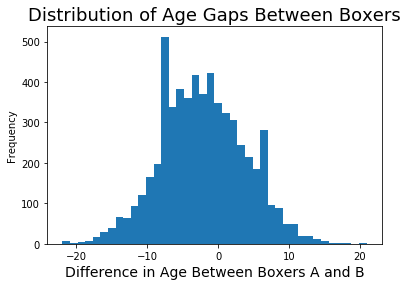

In [4]:
# Explore the distribution of age gaps between the boxers where Boxer A won the match

mask = df['result'] == 'win_A'

df['diff_age'][mask].plot(kind='hist', bins=40)
plt.title('Distribution of Age Gaps Between Boxers', fontsize=18)
plt.xlabel('Difference in Age Between Boxers A and B', fontsize=14)
plt.show()


In [5]:
# Explore the statistics of winning Boxer A's

df.loc[:,['diff_age','diff_height','diff_weight','diff_reach']][mask].describe()

,diff_age,diff_height,diff_weight,diff_reach
count,5864.000000,5864.000000,5864.000000,5864.000000
mean,-2.081003,0.940655,-0.224932,1.097885
std,5.991132,6.801658,14.718452,9.656878
min,-22.000000,-25.000000,-115.000000,-34.000000
25%,-6.000000,-3.000000,-1.000000,-5.000000
50%,-2.000000,1.000000,0.000000,1.000000
75%,2.000000,5.000000,1.000000,7.000000
max,21.000000,24.000000,113.000000,36.000000


In [6]:
# Create columns describing the knockout percentage of the two boxers

df['percent_kos_A'] = np.where(df['won_A']>0, df['kos_A'] / df['won_A'] * 100, 0)
df['percent_kos_B'] = np.where(df['won_B']>0, df['kos_B'] / df['won_B'] * 100, 0)

def describe_kos(num):
    if num<=20:
        return '0-20'
    elif num<=40:
        return '20-40'
    elif num<=60:
        return '40-60'
    elif num<=80:
        return '60-80'
    else:
        return '80-100'
      
    
df['describe_percent_kos_A'] = df['percent_kos_A'].apply(describe_kos)
df['describe_percent_kos_B'] = df['percent_kos_B'].apply(describe_kos)



Text(0,0.5,'Reach (cm)')

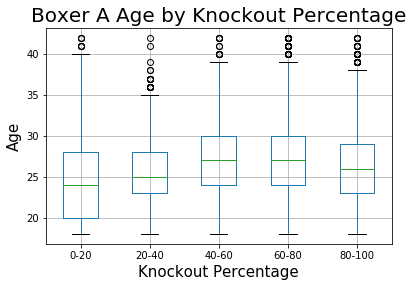

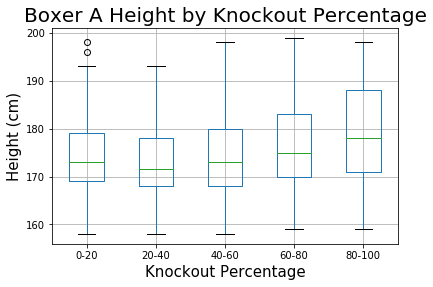

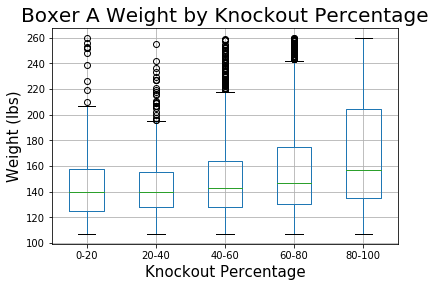

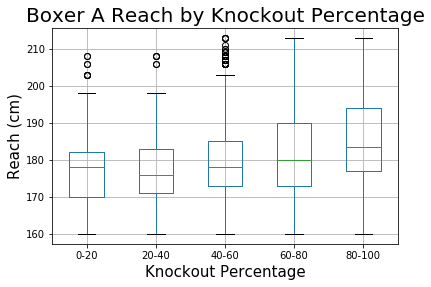

In [7]:
# Create boxplots showing the distributions of Boxer A physical attributes, separated by Boxer A's knockout percentage.

df.boxplot(column = 'age_A', by = 'describe_percent_kos_A')
plt.suptitle('')
plt.title('Boxer A Age by Knockout Percentage', fontsize=20)
plt.xlabel('Knockout Percentage', fontsize=15)
plt.ylabel('Age', fontsize=15)

df.boxplot(column = 'height_A', by = 'describe_percent_kos_A')
plt.suptitle('')
plt.title('Boxer A Height by Knockout Percentage', fontsize=20)
plt.xlabel('Knockout Percentage', fontsize=15)
plt.ylabel('Height (cm)', fontsize=15)

df.boxplot(column = 'weight_A', by = 'describe_percent_kos_A')
plt.suptitle('')
plt.title('Boxer A Weight by Knockout Percentage', fontsize=20)
plt.xlabel('Knockout Percentage', fontsize=15)
plt.ylabel('Weight (lbs)', fontsize=15)

df.boxplot(column = 'reach_A', by = 'describe_percent_kos_A')
plt.suptitle('')
plt.title('Boxer A Reach by Knockout Percentage', fontsize=20)
plt.xlabel('Knockout Percentage', fontsize=15)
plt.ylabel('Reach (cm)', fontsize=15)

## INFERENTIAL STATISTICS: DIFFERENCES IN PHYSICAL ATTRIBUTES

In [8]:
# Define a function for computing permutation samples

def permutation_sample(data1, data2):

    data = np.concatenate((data1, data2))

    permuted_data = np.random.permutation(data)

    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Define a function for computing multiple permutation replicates

def draw_perm_reps(data_1, data_2, func, size=1):

    perm_replicates = np.empty(size)

    for i in range(size):

        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Define a function that computes the difference in sample means

def diff_of_means(sample1, sample2):
    
    diff = np.mean(sample1) - np.mean(sample2)
    
    return diff

# Define a function that runs a permutation hypothesis test between two columns of the DataFrame:
# one where Boxer A is the winner, and the other where Boxer B is the winner

def perm_test_phys(col, comparison = 'less'):
    
    array1 = np.array(df[df['result']=='win_A'][col])
    array2 = np.array(df[df['result']=='win_B'][col])
    
    empirical_diff = diff_of_means(array1, array2)
    
    perm_reps = draw_perm_reps(array1, array2, diff_of_means, size=10000)
    
    if comparison=='less':
        p = np.sum(perm_reps <= empirical_diff) / len(perm_reps)
    elif comparison=='greater':
        p = np.sum(perm_reps >= empirical_diff) / len(perm_reps)
        
    return p
    
    
    
    

In [9]:
### HYPOTHESIS TEST 1: Does the difference in weight have any relationship with the winner of the match?

print('The p-value for this test is:', perm_test_phys('diff_weight'))

The p-value for this test is: 0.6622


+ Based on this large p-value, it would appear that this test is not statistically significant. We do not have sufficient evidence to conclude that the difference in weight is related to the winner of the match.

In [10]:
### HYPOTHESIS TEST 2: Does the difference in height have any relationship with the winner of the match?

print('The p-value for this test is:', perm_test_phys('diff_height', 'greater'))

The p-value for this test is: 0.0


+ Based on this extremely small p-value, it would appear that this test is statistically significant. We can conclude that there is a relationship between the difference in height and the winner of the match.

In [11]:
### HYPOTHESIS TEST 3: Does the difference in reach have any relationship with the winner of the match?

print('The p-value for this test is:', perm_test_phys('diff_reach', 'greater'))

The p-value for this test is: 0.0


+ Based on this extremely small p-value, it would appear that this test is statistically significant. We can conclude that there is a relationship between the difference in reach and the winner of the match.

In [12]:
### HYPOTHESIS TEST 4: Does the difference in age have any relationship with the winner of the match?

print('The p-value for this test is:', perm_test_phys('diff_age'))

The p-value for this test is: 0.0


+ Based on this extremely small p-value, it would appear that this test is statistically significant. We can conclude that there is a relationship between the difference in age and the winner of the match.

## INFERENTIAL STATISTICS: CORRELATION BETWEEN PHYSICAL ATTRIBUTES AND K.O. PERCENTAGE

In [40]:
# Define a function for computing the pearson correlation coefficient between two variables.

def pearson_r(x,y):
    
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

# Define a function that computes the p-value for a test of correlation between a physical attribute column 
# and the K.O. percentage

def corr_test(phys_col):
    
    phys_array = np.array(df[phys_col])
    ko_array = np.array(df['percent_kos_A'])
    
    r_observed = pearson_r(phys_array, ko_array)
    
    perm_reps = np.empty(10000)

    for i in range(10000):
    
        phys_array_permuted = np.random.permutation(phys_array)

        perm_reps[i] = pearson_r(phys_array_permuted, ko_array)
    
    p = np.sum(perm_reps >= r_observed)/len(perm_reps)
    
    return p

In [41]:
### TESTS OF CORRELATION

print('The p-value for the test of correlation between age and K.O. percentage is:', corr_test('age_A'))
print('The observed correlation between these two variables is:', pearson_r(df['age_A'],df['percent_kos_A']))

print('The p-value for the test of correlation between height and K.O. percentage is:', corr_test('height_A'))
print('The observed correlation between these two variables is:', pearson_r(df['height_A'],df['percent_kos_A']))

print('The p-value for the test of correlation between weight and K.O. percentage is:', corr_test('weight_A'))
print('The observed correlation between these two variables is:', pearson_r(df['weight_A'],df['percent_kos_A']))

print('The p-value for the test of correlation between reach and K.O. percentage is:', corr_test('reach_A'))
print('The observed correlation between these two variables is:', pearson_r(df['reach_A'],df['percent_kos_A']))



The p-value for the test of correlation between age and K.O. percentage is: 0.0
The observed correlation between these two variables is: 0.07105221474835687
The p-value for the test of correlation between height and K.O. percentage is: 0.0
The observed correlation between these two variables is: 0.2026622001528255
The p-value for the test of correlation between weight and K.O. percentage is: 0.0
The observed correlation between these two variables is: 0.19509580833412146
The p-value for the test of correlation between reach and K.O. percentage is: 0.0
The observed correlation between these two variables is: 0.2205652234334364


+ As we can see, all four hypothesis tests on correlation between a physical attribute column and knockout percentage were statistically significant. 
+ However, we see that all four observed correlation coefficients are relatively small, bringing practical significance into question. In particular, the correlation between age and knockout percentage is nearly negligible. 
+ The other three correlations, for height, weight, and reach against knockout percentage, are slightly larger. This is perhaps expected, since we would expect taller, heavier, and longer-reaching boxers to accrue more knockouts.